Install the required Python libraries:

In [ ]:
pip install opencv-python pytesseract

Load the Screenshot Image

In [3]:
import matplotlib.pyplot as plt

def showImage(cvImg):
    plt.figure(figsize=(15, 10))
    plt.imshow(cvImg)
    plt.show()    

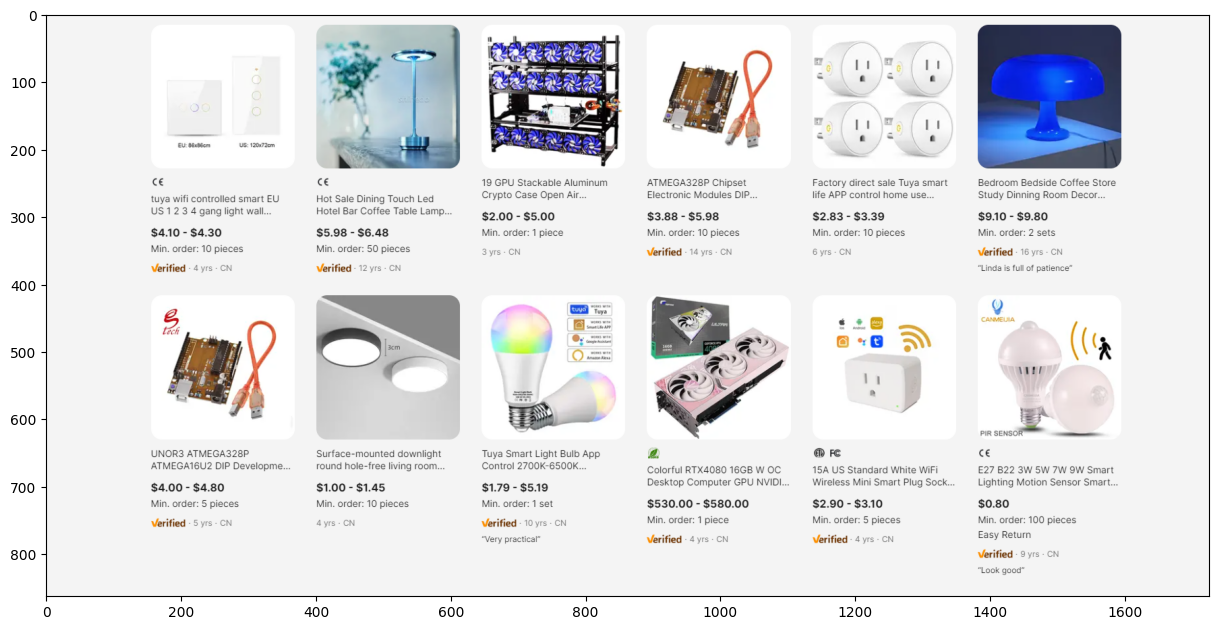

In [4]:
import cv2

# Load the image
image_path = 'screenshot.alibaba.png'
image = cv2.imread(image_path)

showImage(image)

Preprocess the Image

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

Detect Product Cards

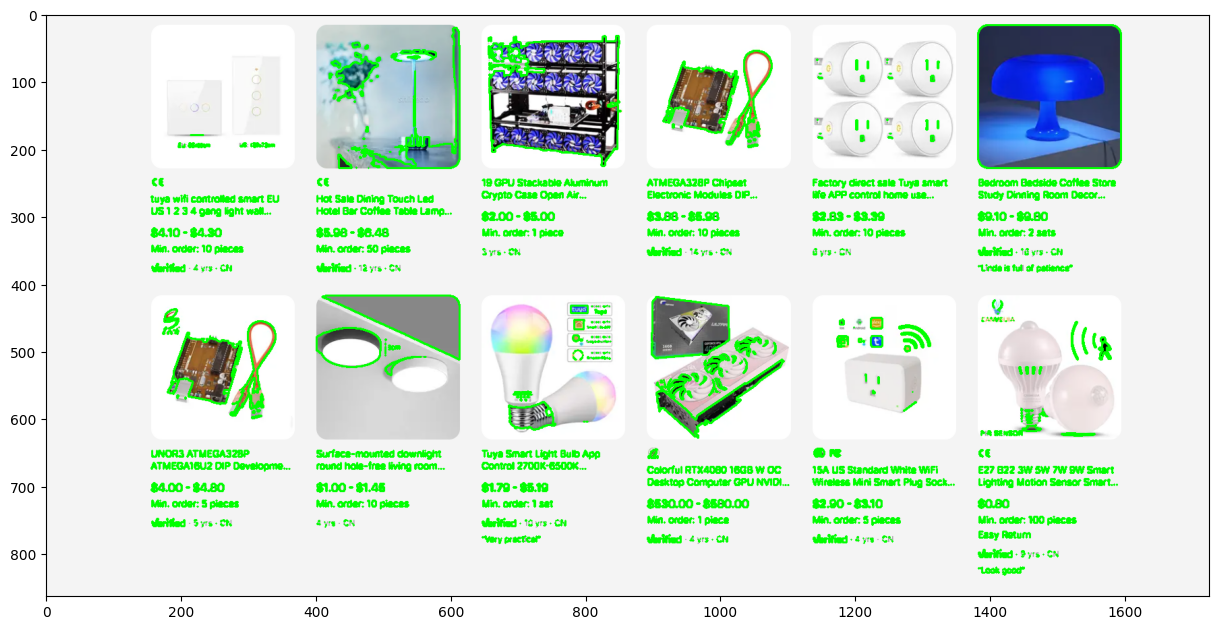

In [6]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours (optional, for visualization)
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
# cv2.imwrite('contours_detected.png', output_image)

showImage(output_image)

Extract Product Cards

In [ ]:
import os

# Create output directory
output_dir = 'extracted_product_cards'
os.makedirs(output_dir, exist_ok=True)

# Iterate through contours and save the extracted product cards
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    product_card = image[y:y+h, x:x+w]
    cv2.imwrite(os.path.join(output_dir, f'product_card_{i}.png'), product_card)

Extract Text from Product Cards (Optional)

In [ ]:
import pytesseract

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    product_card = image[y:y+h, x:x+w]
    
    # Convert product card to grayscale for OCR
    product_card_gray = cv2.cvtColor(product_card, cv2.COLOR_BGR2GRAY)
    
    # Extract text using Tesseract OCR
    text = pytesseract.image_to_string(product_card_gray)
    print(f"Text from product card {i}:")
    print(text)
    print("-" * 50)